<a href="https://colab.research.google.com/github/Mi1kDev/CST3133_CW/blob/main/CST3133_CourseWork_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Coursework Part 1


Connecting the project to google drive for easy members access

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 1.1.1 Dataset Selection and Problem Definition

-- clustering problem

-- database from kaggle link bellow

https://www.kaggle.com/code/mervanmunis/bank-transaction-for-fraud-detection-eda-ml



Importing core python libraries


*   pandas for dataset manipulation
*   numpy for mathematical processes
*   pyplot and seaborn for data visualization



In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/drive/MyDrive/CST3133_CW/datasets/test.csv")
print(dataset.head())

Display general information breakdown of the dataset

In [50]:
print(dataset.describe())

       TransactionAmount                TransactionDate  CustomerAge  \
count        2512.000000                           2512  2512.000000   
mean          297.593778  2023-07-05 20:32:10.826433024    44.673965   
min             0.260000            2023-01-02 16:00:06    18.000000   
25%            81.885000  2023-04-03 16:22:05.750000128    27.000000   
50%           211.140000     2023-07-07 17:49:43.500000    45.000000   
75%           414.527500     2023-10-06 18:40:53.500000    59.000000   
max          1919.110000            2024-01-01 18:21:50    80.000000   
std           291.946243                            NaN    17.792198   

       TransactionDuration  LoginAttempts  AccountBalance  \
count          2512.000000    2512.000000     2512.000000   
mean            119.643312       1.124602     5114.302966   
min              10.000000       1.000000      101.250000   
25%              63.000000       1.000000     1504.370000   
50%             112.500000       1.000000     

In [51]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   TransactionID                     2512 non-null   object        
 1   AccountID                         2512 non-null   object        
 2   TransactionAmount                 2512 non-null   float64       
 3   TransactionDate                   2512 non-null   datetime64[ns]
 4   TransactionType                   2512 non-null   object        
 5   Location                          2512 non-null   object        
 6   DeviceID                          2512 non-null   object        
 7   IP Address                        2512 non-null   object        
 8   MerchantID                        2512 non-null   object        
 9   Channel                           2512 non-null   object        
 10  CustomerAge                       2512 non-null 

# 1.1.2 Data Preprocessing

Handle missing values appropriately, as required.

Scale/normalize numerical features and encode categorical variable, as required.

Conduct logical feature selection or engineering, as required.

Checks for any missing values in the dataset

In [ ]:
# Checking for missing values
missing_values = ["n/a", "na", "--"]
print(dataset.isnull().sum())
print(dataset.isnull().sum().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
0


Converts the datatype of the date object fields to actual datetype fields

In [ ]:
#Converting dates to  datetime objects
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'])
dataset['PreviousTransactionDate'] = pd.to_datetime(dataset['PreviousTransactionDate'])

Normalize data columns using min-max feature scaling. Normalization is done to ensure that features operate on the same scale and consequently no feature is overvalued in its relevance due to being on a greater overall scale.

In [ ]:
#Normalization of data using min-max feature scaling
def normalizeColumn(inputDS, columnName):
  normalizedName = "Normalized"+columnName
  inputDS[normalizedName] = (inputDS[columnName] - inputDS[columnName].min()) / (inputDS[columnName].max() - inputDS[columnName].min())

normalizeColumn(dataset, "TransactionAmount")
normalizeColumn(dataset, "AccountBalance")
normalizeColumn(dataset, "TransactionDuration")
normalizeColumn(dataset, "CustomerAge")
normalizeColumn(dataset, "LoginAttempts")

Encode categorical data values for use

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Encoding categorical data

#Maps an hour as an integer to a time of day
def mapHour(h):
  if h >= 5 and h < 12:
    return "Morning"
  elif h >= 12 and h < 17:
    return "Afternoon"
  elif h >= 17 and h < 20:
    return "Evening"
  elif h >= 20 or h < 5:
    return "Night"
  else:
    return "NaN"

#encodes dates into two columns the day and the period of the day
def convertDate(ds, dateColumn, dayColumn, timeColumn):
  day = ds[dateColumn].dt.day_name()
  hour = ds[dateColumn].dt.hour
  hour = hour.map(mapHour)

  ds[dayColumn] = day
  ds[timeColumn] = hour

convertDate(dataset, 'TransactionDate', 'TransactionDateWeek', 'TransactionDateTimeOfDay')
convertDate(dataset, 'PreviousTransactionDate', 'PreviousTransactionDateWeek', 'PreviousTransactionDateTimeOfDay')

#Hot Encode the categorical data
categoricalData = dataset[['Location', 'Channel', 'CustomerOccupation', 'TransactionType', 'TransactionDateWeek', 'TransactionDateTimeOfDay', 'PreviousTransactionDateWeek', 'PreviousTransactionDateTimeOfDay']].columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
oneHotEncoded = encoder.fit_transform(dataset[categoricalData])
dataset['Hour'] = dataset['TransactionDate'].dt.hour
oneHotCategoricalData = pd.DataFrame(oneHotEncoded, columns=encoder.get_feature_names_out(categoricalData))

#Dataset with all values for model training

#feature selection for final values needed for clustering
strippedDataset = pd.concat([dataset[['NormalizedCustomerAge', 'NormalizedTransactionAmount', 'NormalizedAccountBalance', 'NormalizedTransactionDuration', 'NormalizedLoginAttempts']], oneHotCategoricalData[['Channel_ATM', 'Channel_Branch', 'Channel_Online', 'TransactionType_Debit', 'TransactionType_Credit']]], axis=1)




0      2023-04-11 16:29:14
1      2023-06-27 16:44:19
2      2023-07-10 18:16:08
3      2023-05-05 16:32:11
4      2023-10-16 17:51:24
               ...        
2507   2023-04-26 17:09:36
2508   2023-03-22 17:36:48
2509   2023-08-21 17:08:50
2510   2023-02-24 16:24:46
2511   2023-02-14 16:21:23
Name: TransactionDate, Length: 2512, dtype: datetime64[ns]
0      2024-11-04 08:08:08
1      2024-11-04 08:09:35
2      2024-11-04 08:07:04
3      2024-11-04 08:09:06
4      2024-11-04 08:06:39
               ...        
2507   2024-11-04 08:11:29
2508   2024-11-04 08:11:42
2509   2024-11-04 08:08:39
2510   2024-11-04 08:12:22
2511   2024-11-04 08:07:49
Name: PreviousTransactionDate, Length: 2512, dtype: datetime64[ns]


# 1.1.3 Exploratory Data Analysis

Create insightful visualizations, e.g., histograms and correlation heatmaps.

Identify and comment on trends, patterns, and potential biases in the data.

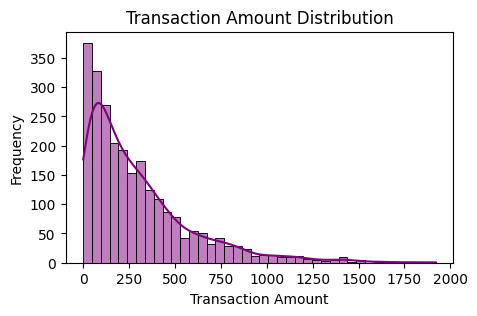

In [ ]:
#Transaction Amount Diistribution

plt.figure(figsize = (5,3))
sns.histplot(dataset['TransactionAmount'], kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

From the transaction distribution graph we could observe we have low to high volume transatcions.

In our case the high volume transactions are rare, form this point we can consider to secure it for potential fraudulent transaction

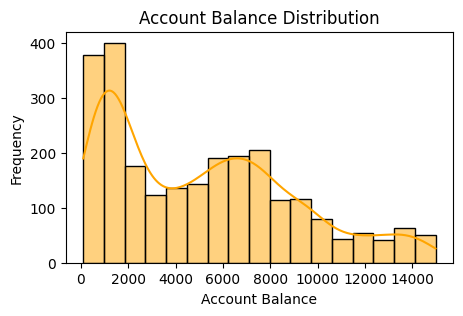

In [ ]:
#Account Balance Distribution
plt.figure(figsize = (5,3))
sns.histplot(dataset['AccountBalance'], kde=True, color='orange')
plt.title('Account Balance Distribution')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

The high amount of transaction as shown on the plot could carry risk in terms of low balances

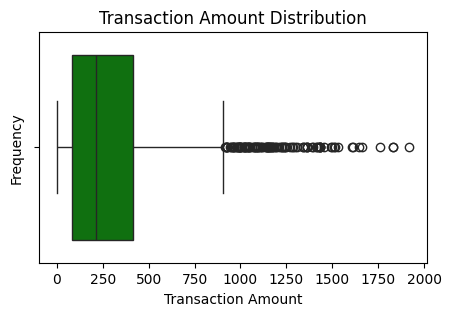

In [ ]:
# Detecting outliers
plt.figure(figsize=(5,3))
sns.boxplot(x='TransactionAmount', data=dataset, color='green')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Outliers overview brough us the observation of abnormally high transactions, which are in fraud risk.

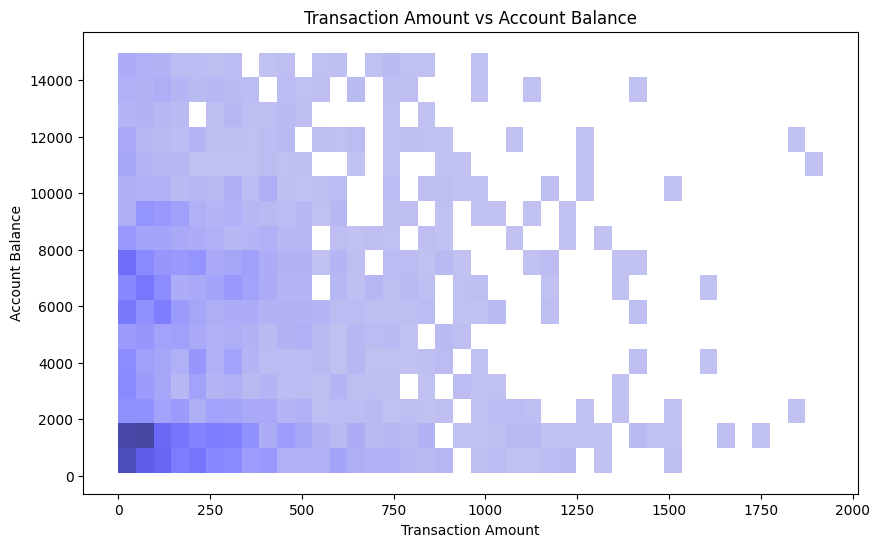

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x=dataset['TransactionAmount'], y=dataset['AccountBalance'], kde=True, color = 'blue')
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

As presented the account balance is low and high amount transactions could vary of a potential risk, therefore we need to consider this and be extra carefull in terms of handaling those transcations.

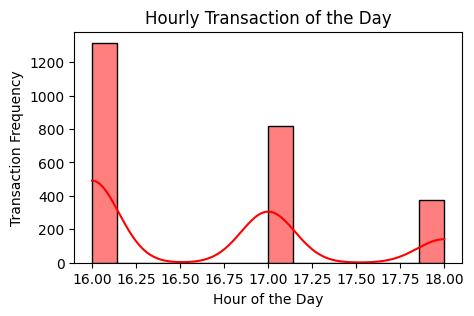

In [ ]:
# Hourly Transaction of the Day
plt.figure(figsize=(5,3))
sns.histplot(dataset['Hour'], kde=True,color='red')
plt.title('Hourly Transaction of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Frequency')
plt.show()

The main transactions throughout the day are between 16:00-18:00, the high transactions are from 16:00 and slowwing down between 1&:00 and 18:00

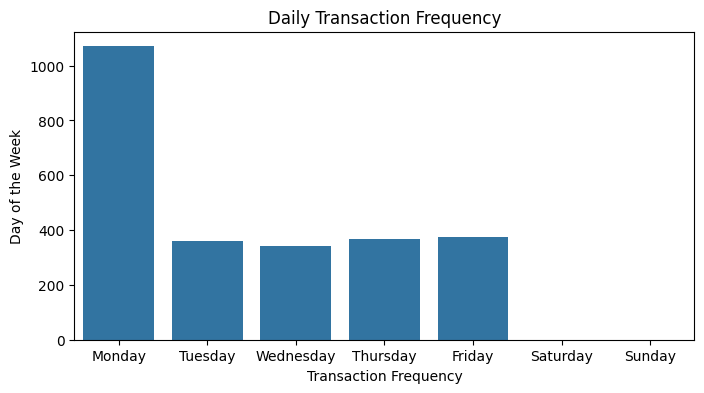

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data = dataset, x='TransactionDateWeek', order=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Day of the Week')
plt.show()

Transactions are shown the most during the week days, compare to the weekends where the decrease number of transactions may vary of abnormal behavior.

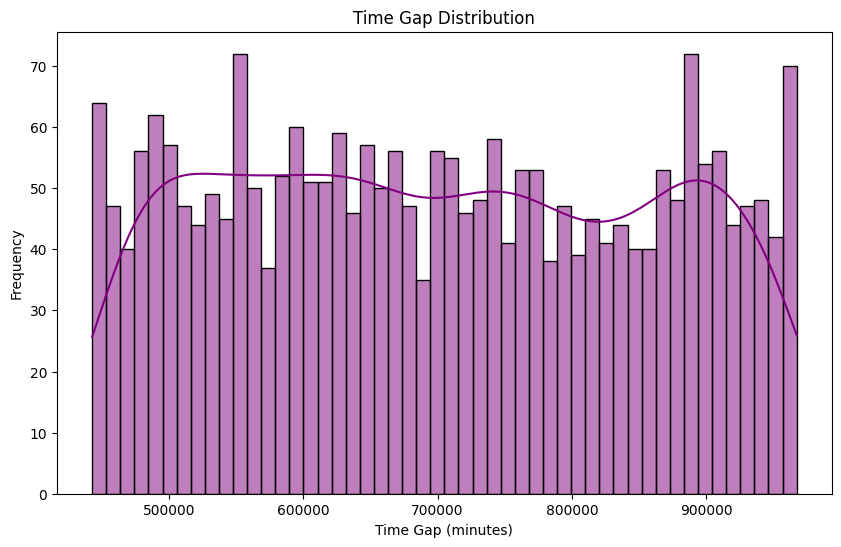

In [ ]:
# Time Gap analysis for anonaly detection
dataset['TimeGap'] = -1 * (dataset['TransactionDate'] - dataset['PreviousTransactionDate']).dt.total_seconds() / 60

# plot the TimeGap
plt.figure(figsize=(10,6))
sns.histplot(dataset['TimeGap'], kde=True, bins=50, color='purple')
plt.title('Time Gap Distribution')
plt.xlabel('Time Gap (minutes)')
plt.ylabel('Frequency')
plt.show()

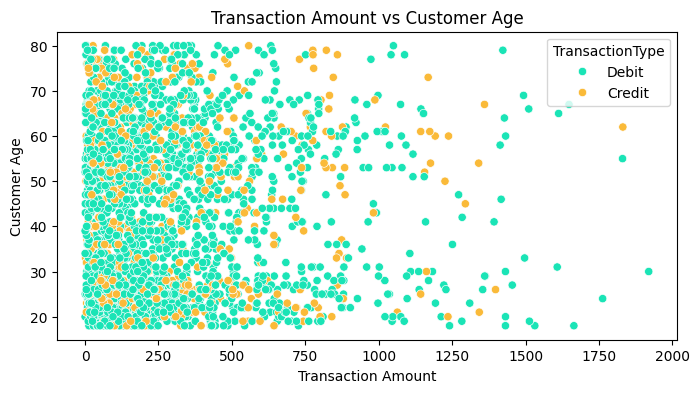

In [ ]:
# Tranasaction Amount vs Customer Age Analysis
plt.figure(figsize=(8,4))
sns.scatterplot(x='TransactionAmount', y='CustomerAge', data=dataset, hue='TransactionType', palette='turbo')
plt.title('Transaction Amount vs Customer Age')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Age')
plt.show()

The plot above shows how the transaction amount varies based on the customer age.

We may determinate if there are any patterns or unusual behaviors of how people of different ages spend money by examining the plot.

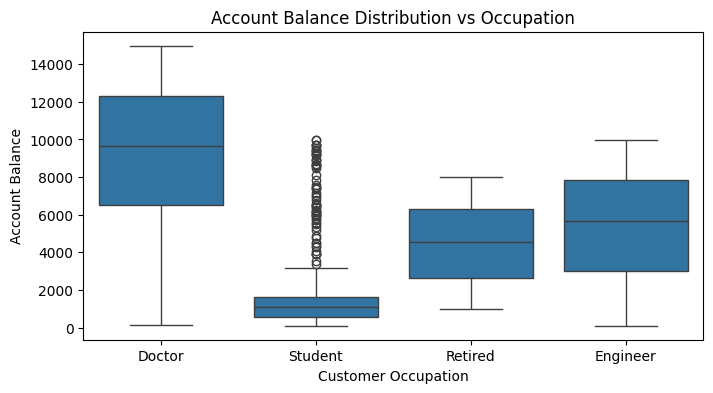

In [ ]:
# Account Balance vs Occupation Analysis
plt.figure(figsize=(8,4))
sns.boxplot(x='CustomerOccupation', y='AccountBalance', data=dataset)
plt.title('Account Balance Distribution vs Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Account Balance')
plt.show()

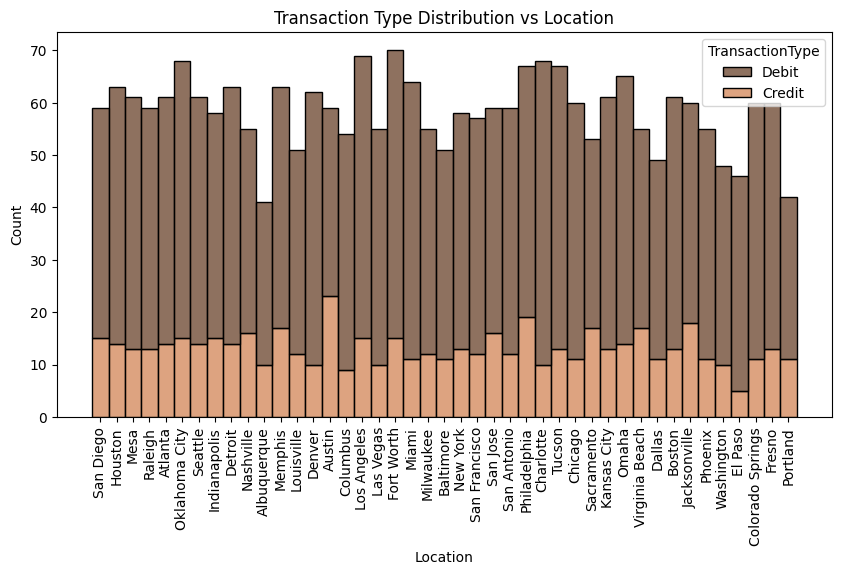

In [ ]:
# Analysing Transaction Type Distribution vs Location
plt.figure(figsize=(10,5))
sns.histplot(x='Location', data=dataset, hue='TransactionType', multiple='stack', palette='copper')
plt.title('Transaction Type Distribution vs Location')
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

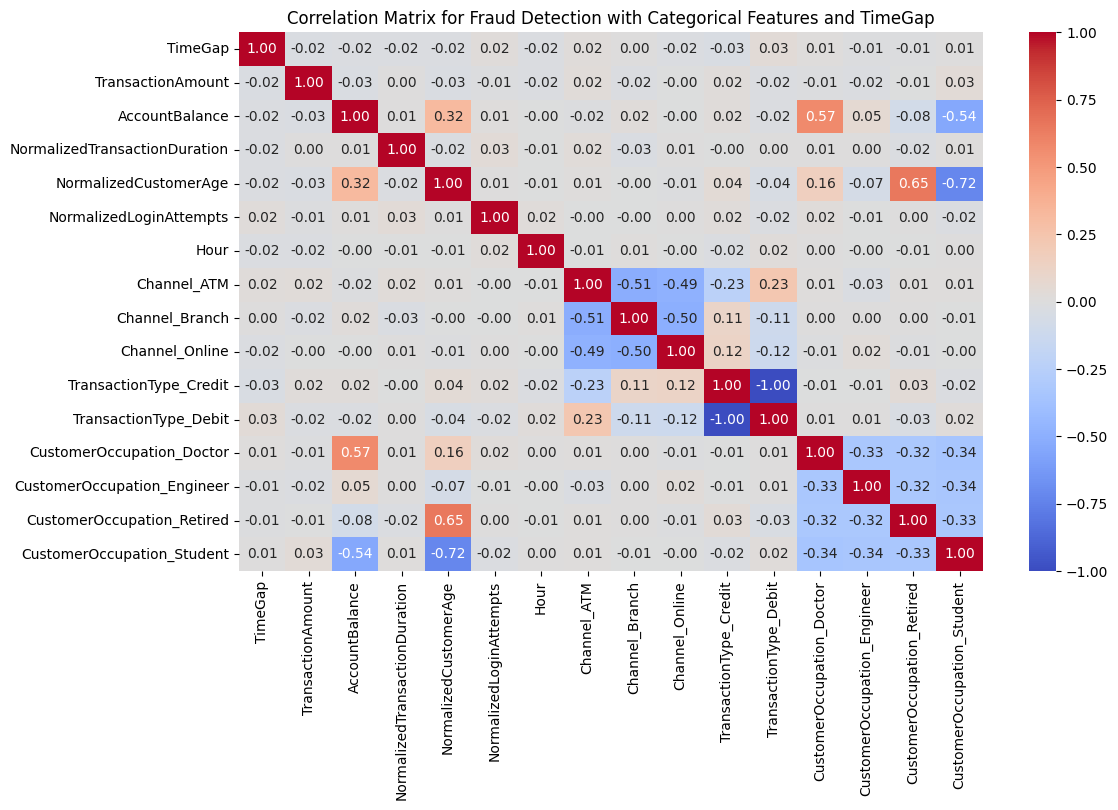

In [ ]:
# Correlation Heatmaps implementation
# Selecting features for correlation analysis
features_for_correlation = ['TransactionAmount','AccountBalance', 'NormalizedCustomerAge', 'NormalizedTransactionDuration', 'NormalizedLoginAttempts', 'Hour', 'Channel', 'TransactionType', 'CustomerOccupation', 'TimeGap']
data_for_correlation = dataset[features_for_correlation]

#One hot encoding for categorical data
categorical_features = ['Channel', 'TransactionType', 'CustomerOccupation']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data_for_correlation[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

#combine the encoded features with numerical
numerical_features = ['TimeGap', 'TransactionAmount', 'AccountBalance', 'NormalizedTransactionDuration', 'NormalizedCustomerAge', 'NormalizedLoginAttempts', 'Hour']
data_for_correlation = pd.concat([data_for_correlation[numerical_features], encoded_df], axis=1)

# Calculating the correlation matrix
corr_matrix = data_for_correlation.corr()

# Plotting the heatmap
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Fraud Detection with Categorical Features and TimeGap')
plt.yticks(rotation=0)
plt.show()

The correlation heatmap illustrates the interrelationships among features in a dataset, employing a color gradient to indicate the strength and nature of these correlations.

Warm colors signify positive correlations, while cool colors denote negative correlations, and neutral colors indicate weak or absent relationships.

This visualization serves as a valuable tool for data analysts to detect trends, enhance feature selection, comprehend model interactions, and ultimately extract actionable insights from the data.

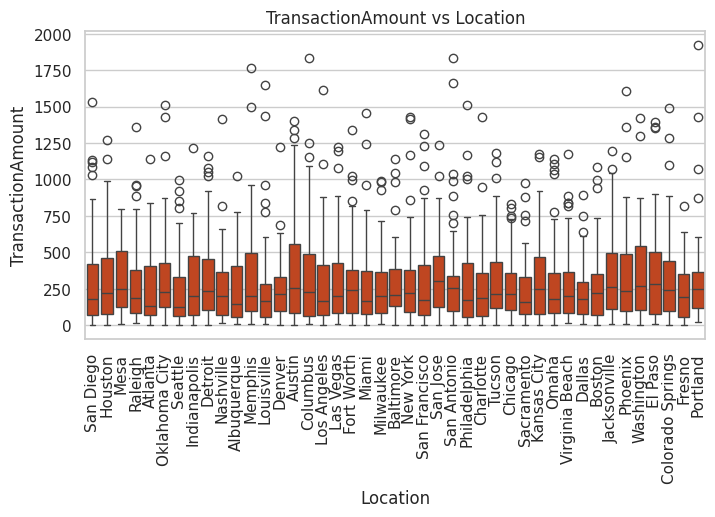

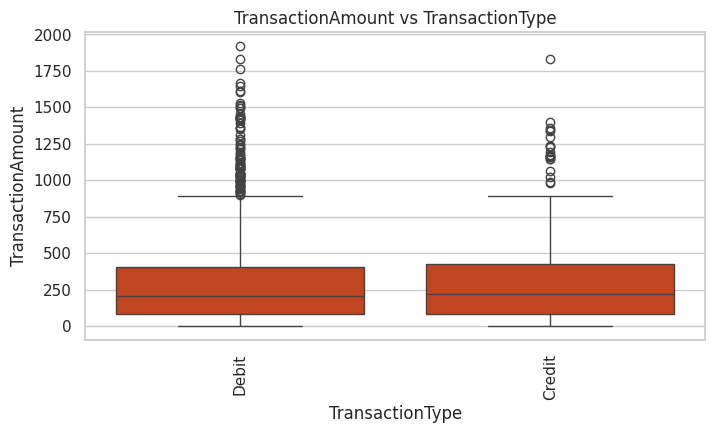

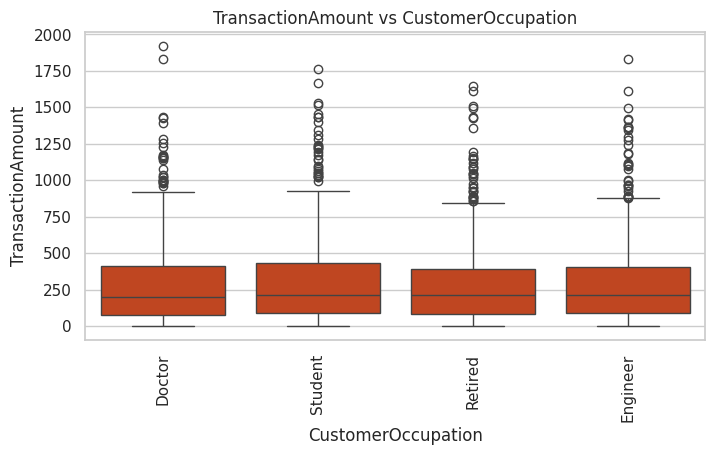

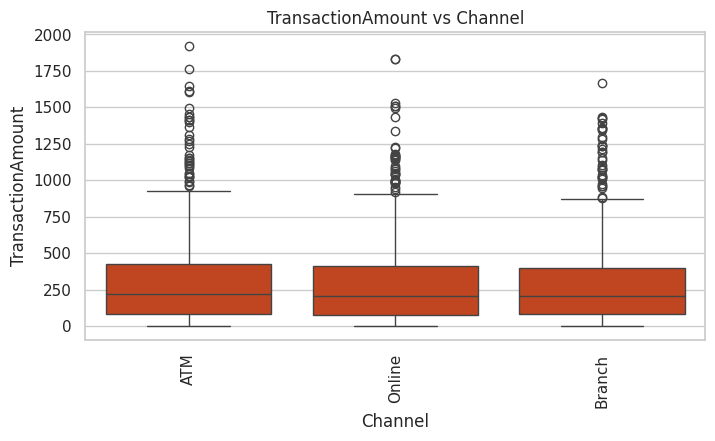

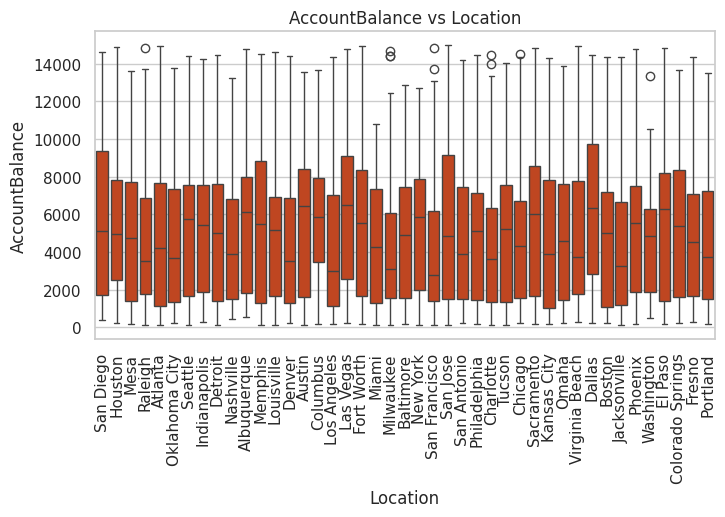

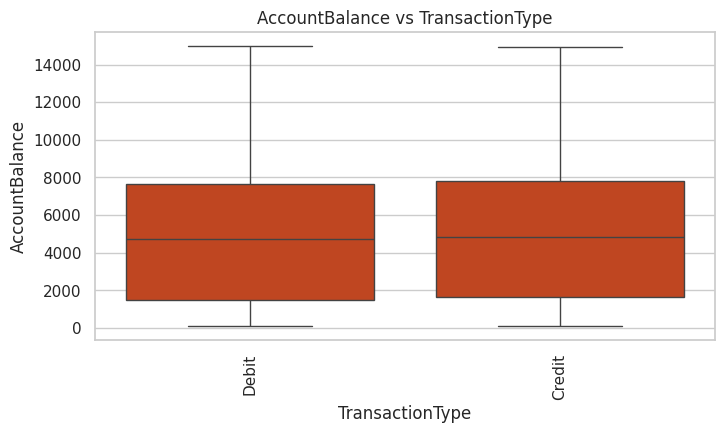

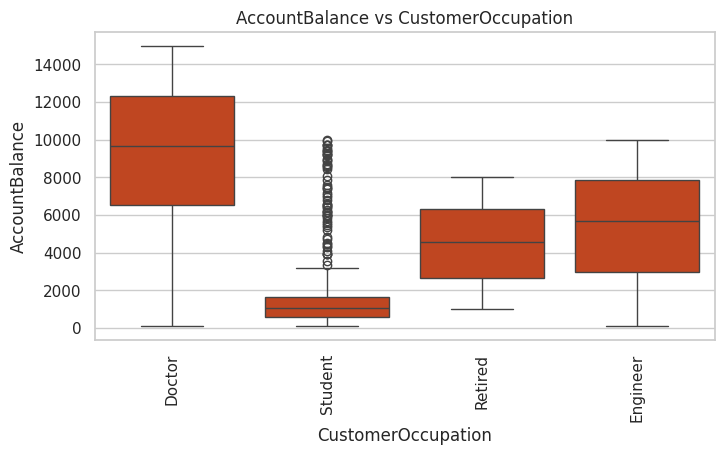

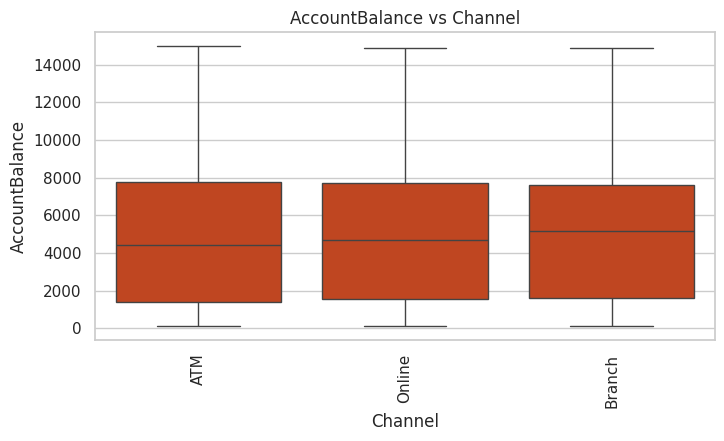

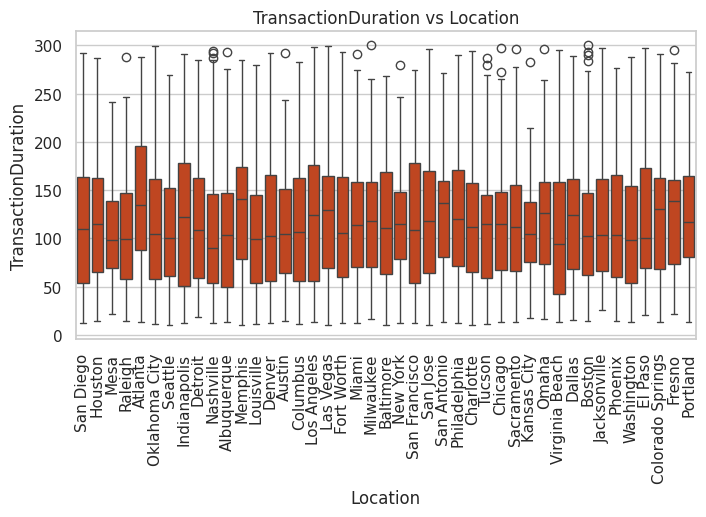

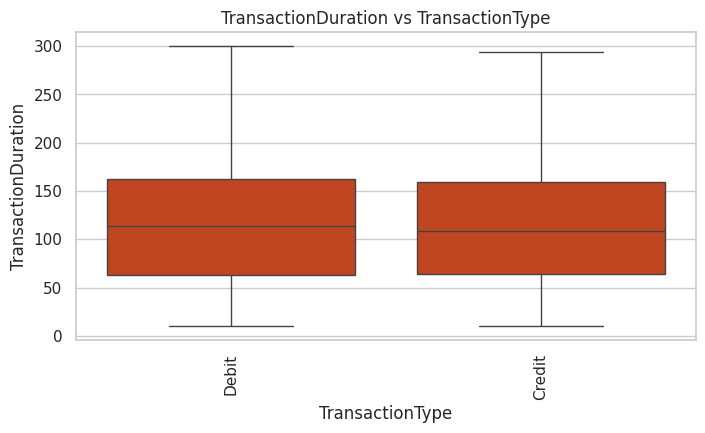

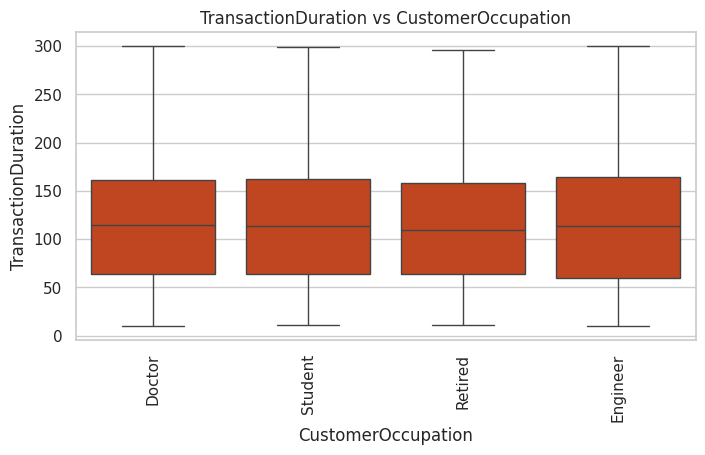

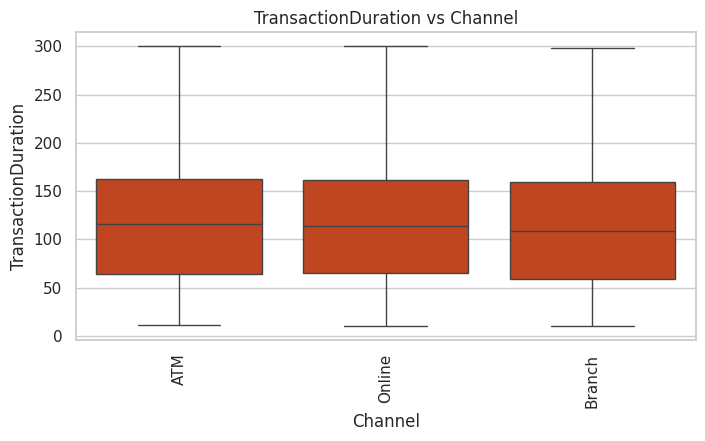

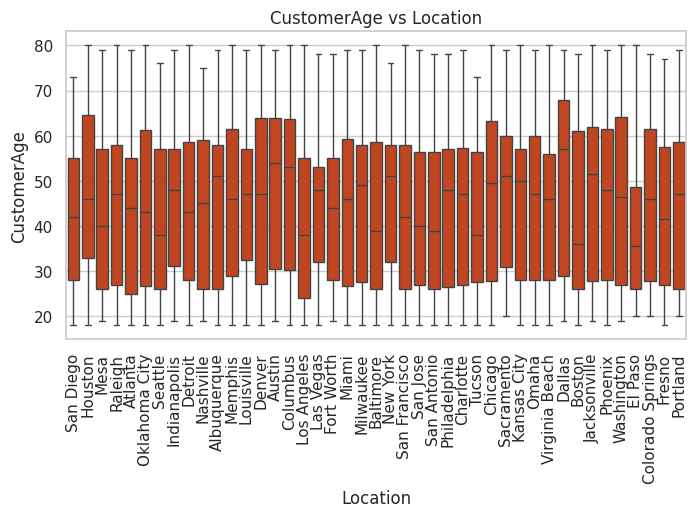

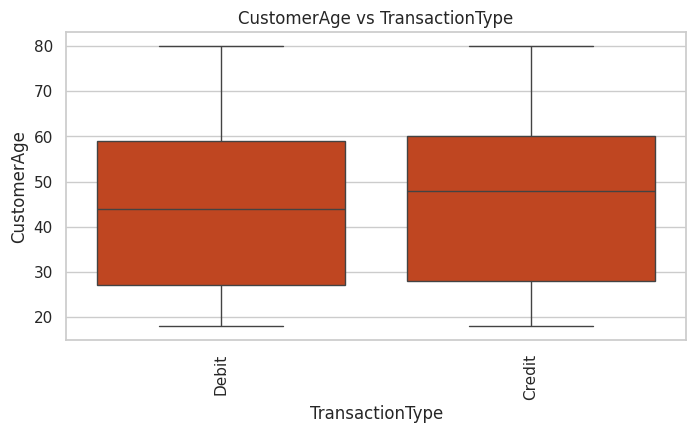

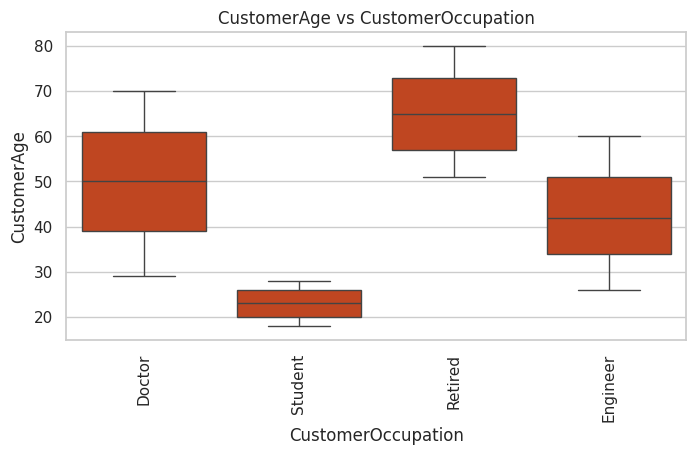

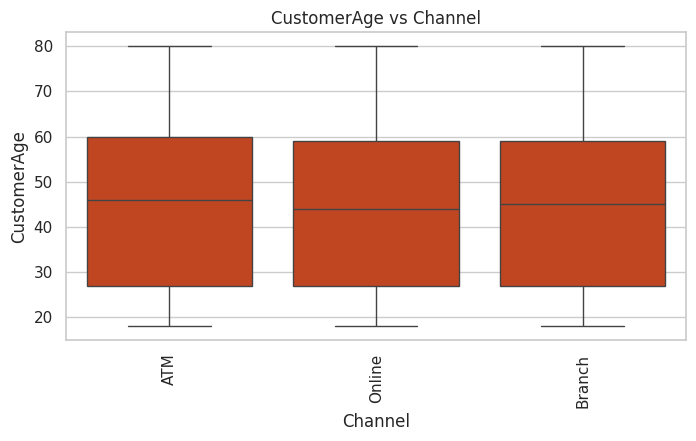

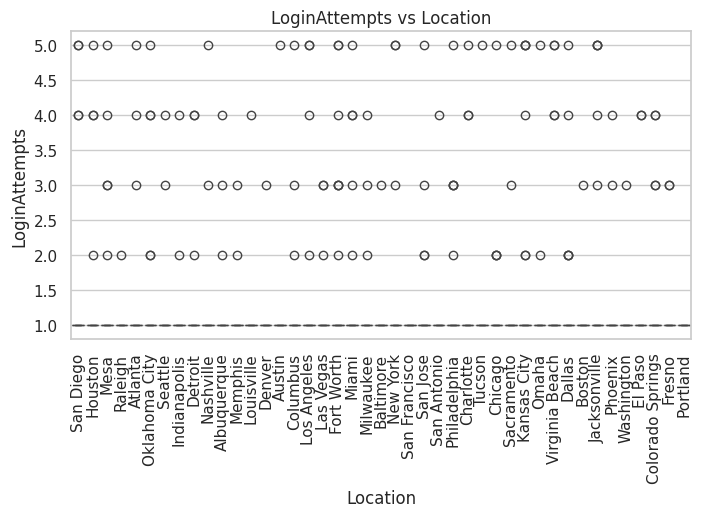

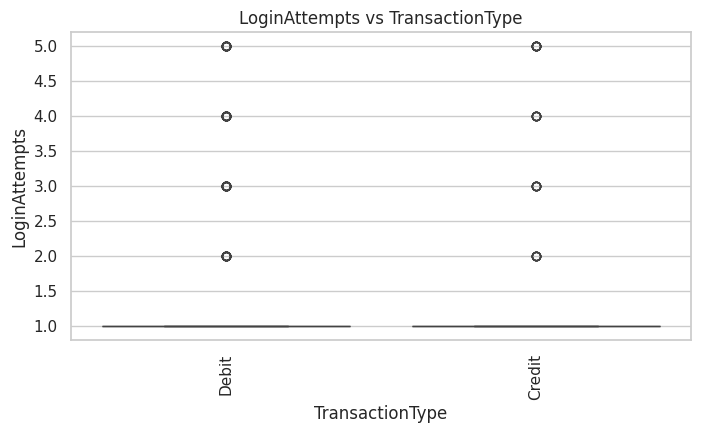

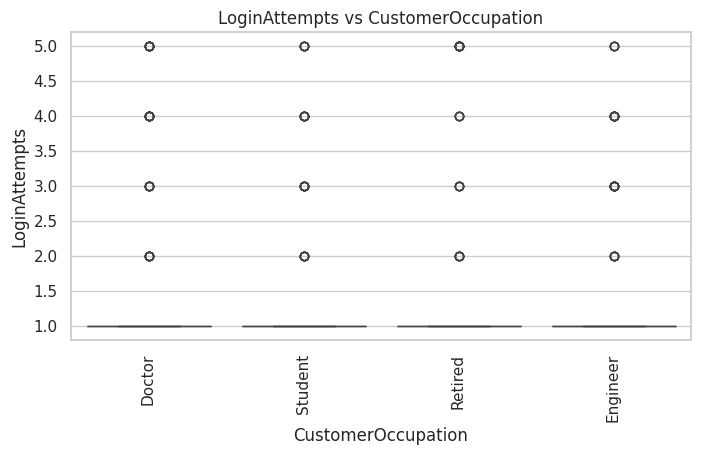

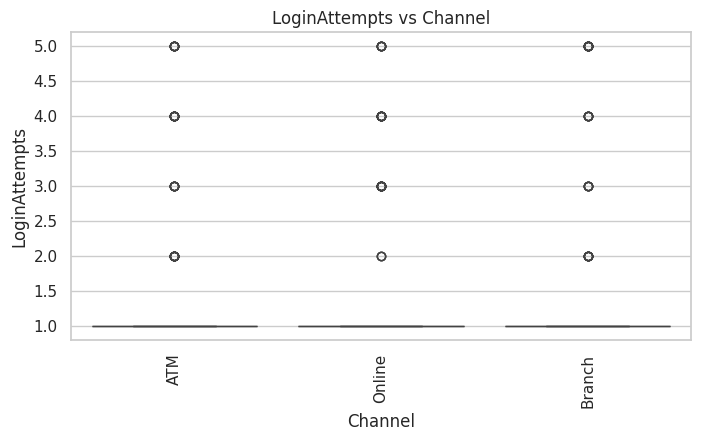

In [ ]:
# Numerical and Categorical Analysis over the Columns
#set a colorful style for the plots
sns.set(style='whitegrid', palette='turbo_r')

# creating numerical columns for analysis
numerical_columns = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'CustomerAge', 'LoginAttempts']
# creating categorical columns for analysis
categorical_columns = ['Location', 'TransactionType', 'CustomerOccupation', 'Channel']

for numerical in numerical_columns:
  for categorical in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=categorical, y=numerical, data=dataset)
    plt.title(f'{numerical} vs {categorical}')
    plt.xticks(rotation=90) #rotating x-axis label for better readibility
    plt.xlabel(categorical)
    plt.ylabel(numerical)
    plt.show()


Using box plots, the plots show a comparison of the dataset's numerical and categorical variables.  Through the display of central tendency, spread, and skewness, it aids in the analysis of patterns, trends, and potential outliers by illustrating how the distribution across numerical variables differs across other category features.

 By examining these connections, the research sheds light on how various aspects could be influenced by the interaction.  Visualising more data and model development helps to understand it.

# 1.1.4 Model Development and Evaluation

Train and evaluate learning models, e.g., supervised: linear regression, decision trees, and unsupervised: K-means.

Use appropriate evaluation metrics, e.g., R-squared, accuracy, precision, recall, F1-score, etc.

Provide a clear interpretation of the model performance using classification report, tables or graphs.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report

# K Means for Fraud Detection

Utilize Multi-Dimensional Scaling to scale down features of the dataset primarily for data visualization

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
reducedCluster = mds.fit_transform(strippedDataset)


Utilize the elbow method to determine the optimal value for K in K-Means Clustering

In [ ]:
# Elbow Method for identifying optimal K Value
from scipy.spatial.distance import cdist
distortions = []
inertia = []
K = range(1, 10)
for k in K:
  kMeans = KMeans(n_clusters = k, random_state=42)
  kMeans.fit(reducedCluster)
  distortions.append(sum(np.min(cdist(reducedCluster, kMeans.cluster_centers_, 'euclidean'), axis=1)**2) / reducedCluster.shape[0])
  inertia.append(kMeans.inertia_)



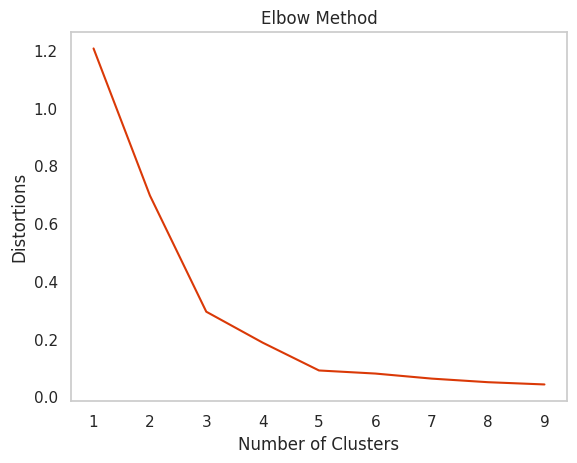

In [ ]:
# Plot using distortions
plt.plot(K, distortions)
plt.xlabel("Number of Clusters")
plt.ylabel("Distortions")
plt.title("Elbow Method")
plt.grid()
plt.show()

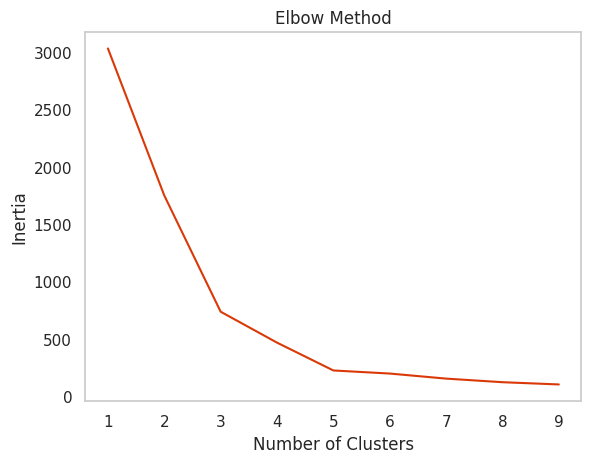

In [ ]:
# Plot using inertia
plt.plot(K, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid()
plt.show()

Applies K-Means clustering to the scaled down set of features

In [ ]:
fraud_k_means = KMeans(n_clusters = 5, random_state=42)
fraud_k_means.fit(reducedCluster)

strippedDataset['Clustered'] = fraud_k_means.labels_
strippedDataset['ScaledDown'] = reducedCluster.tolist()


Display the Silhouette Score of the clustering. The Silhouette Score measures how similar a data point is to its cluster as well as how separated the cluster is from other clusters. Higher scores indicate better overall clustering results

In [ ]:
fraud_silhouette_avg = silhouette_score(reducedCluster, strippedDataset['Clustered'])
print(f"Silhouette Score: {fraud_silhouette_avg}")

Silhouette Score: 0.722301337245609


Visualization of the clustered groups of datapoints

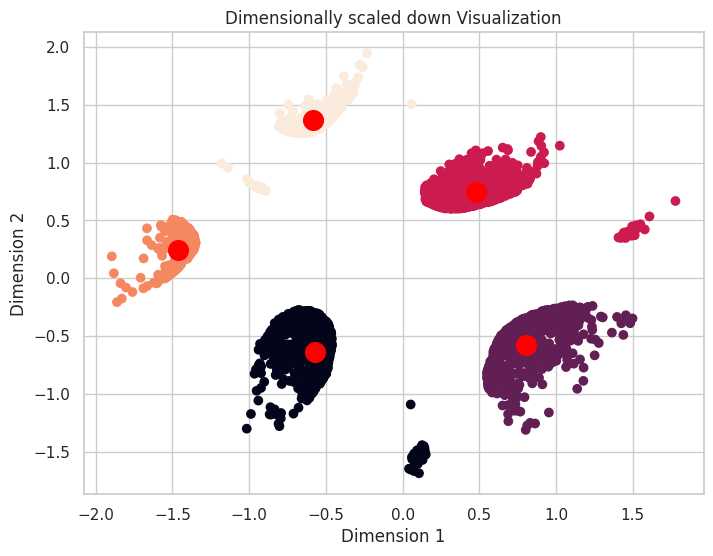

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reducedCluster[:, 0], reducedCluster[:, 1], c=strippedDataset['Clustered'])
plt.scatter(fraud_k_means.cluster_centers_[:, 0], fraud_k_means.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("Dimensionally scaled down Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Outlier Identification

Outliers are those specific data entries which fall very far away from the majority of their cluster. These are likely candidates for fraudulent transactions.

Sorting the data points by their distance to their cluster's centroid will show those data points which fall far from the other entries. Comparing these data points distances to the average distance of the points in that cluster to the centroid could be helpful in confirming an outlier.

In [ ]:
def getEuclideanDist(ds, centroids):
  clusterGroup = ds['Clustered']
  scaledDown = ds['ScaledDown'].apply(pd.Series).to_numpy()
  centroidLoc = np.array(centroids[clusterGroup])
  distances = []

  for i in range(scaledDown.shape[0]):
    dist = np.linalg.norm(scaledDown[i] - centroidLoc[i])
    distances.append(dist)
  ds['DistanceToCentroid'] = distances


# get the euclidean distance of each point to its cluster's centroid
getEuclideanDist(strippedDataset, fraud_k_means.cluster_centers_)

In [62]:
groupedByCluster = strippedDataset.groupby('Clustered')['DistanceToCentroid']
average_centroid_to_point_dist = groupedByCluster.mean()
median_centroid_to_point_dist = groupedByCluster.median()
uniqueClusters = strippedDataset['Clustered'].unique()
uniqueClusters.sort()

outliers = []
threshold = 0.25
#threshold determines how far from the mean data point distance a data point needs to be to be considered an outlier
for c in uniqueClusters:
  metric = average_centroid_to_point_dist[c] + (average_centroid_to_point_dist[c] * threshold)
  cluster = strippedDataset.loc[(strippedDataset['Clustered'] == c) & (strippedDataset['DistanceToCentroid'] > metric)]
  outliers.append(cluster)

for clusterGroup in range(len(outliers)):
  print(f"Cluster Number: {clusterGroup} and number of outliers {len(outliers[clusterGroup])}")

getCluster = int(input("Insert Cluster Group: "))
if getCluster > -1 and getCluster <= len(outliers):
  for i in outliers[getCluster].index:
      print(dataset.loc[[i]])


Cluster Number: 0 and number of outliers 128
Cluster Number: 1 and number of outliers 104
Cluster Number: 2 and number of outliers 105
Cluster Number: 3 and number of outliers 99
Cluster Number: 4 and number of outliers 120
Cluster Number: 5 and number of outliers 81
Insert Cluster Group: 2
   TransactionID AccountID  TransactionAmount     TransactionDate  \
19      TX000020   AC00285              71.48 2023-06-08 18:18:50   

   TransactionType  Location DeviceID     IP Address MerchantID Channel  ...  \
19          Credit  Columbus  D000039  120.170.93.69       M039  Online  ...   

    NormalizedAccountBalance NormalizedTransactionDuration  \
19                  0.434728                      0.548276   

    NormalizedCustomerAge  NormalizedLoginAttempts  TransactionDateWeek  \
19                    0.0                      0.0             Thursday   

   TransactionDateTimeOfDay  PreviousTransactionDateWeek  \
19                  Evening                       Monday   

    Previou

# 1.1.5 Ethical Considerations


Highlight potential biases or fairness issues in the dataset or models.

Suggest practical strategies for mitigating these ethical challenges.

# Natural Language Processing and Deep Learning Coursework Part 2

Import dataset for use in Natural Language Processing

In [52]:
nlp_dataset = pd.read_csv("/content/drive/MyDrive/CST3133_CW/datasets/IMDB Dataset.csv")

# 1.2.1 Text Dataset Selection and Preprocessing


Select a publicly available text dataset, for example, IMDb reviews, Amazon product reviews, AG News, depending
on what you want to achieve.

Preprocess the dataset, for example, clean text, tokenize, remove stopwords, etc.

Use pre-trained embeddings, e.g., GloVe, Word2Vec for feature representation.

# 1.2.2 Deep Learning Model Implementation


Design and train a neural network, e.g., RNN, LSTM for a text-based task, e.g., sentiment analysis.

Clearly explain the model architecture, e.g., embedding layers, hidden layers, activation functions, and
hyperparameter tuning

# 1.2.3 Evaluation and Insights


Use evaluation metrics, e.g., accuracy, precision, recall, loss curves.

Provide visualizations, e.g., learning curves, confusion matrices, to explain findings, where possible.

Highlight strengths, limitations and areas for improvement.